## DISCIPLINA INTELIGÊNCIA ARTIFICIAL
### **APRENDIZAGEM NÃO SUPERVISIONADA: AGRUPAMENTO**

Exemplo: Algoritmo K-Means para agrupar clientes de um shopping.

Os dados foram extraídos do site do Kaggle:

https://www.kaggle.com/datasets/datascientistanna/customers-dataset/data

## Dataset

The dataset we will be using for this clustering problem contains the following columns:

1. **Customer ID**: A unique identifier for each customer.
2. **Gender**: The gender of the customer.
3. **Age**: The age of the customer.
4. **Annual Income**: The annual income of the customer.
5. **Spending Score**: Score assigned by the shop, based on customer behavior and spending nature.
6. **Profession**: The profession of the customer.
7. **Work Experience**: The number of years of work experience of the customer.
8. **Family Size**: The size of the customer's family.


In [ ]:
import numpy as np
import pandas as pd

#### (1) Carregando a base de dados

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
base = 'Customers.csv'
path = '/content/drive/MyDrive/Disciplinas/IA-2023-2/Aprendizado-Maquina/Dataset/'
df=pd.read_csv(path+base)

#### (2) Análise da base de dados

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [ ]:
df.isna().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [ ]:
df['Profession'].value_counts()
# df['Profession'].unique()

Artist           612
Healthcare       339
Entertainment    234
Engineer         179
Doctor           161
Executive        153
Lawyer           142
Marketing         85
Homemaker         60
Name: Profession, dtype: int64

In [ ]:
df.shape

(2000, 8)

In [ ]:
import plotly.express as px

In [ ]:
hist =  px.histogram (df,  x = "Annual Income ($)", nbins=60)
hist.update_layout(width=600,height=400,title_text='Distribuição da renda')
hist.show()

#### (3) Pré processamento

In [ ]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income ($)',
       'Spending Score (1-100)', 'Profession', 'Work Experience',
       'Family Size'],
      dtype='object')

In [ ]:
# RELAÇÃO DA QUANTIDADE DADOS FALTANTES
df.isnull().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [ ]:
# Remove as amostras com dados faltantes em Profissão
df=df.dropna()

In [ ]:
df.shape

(1965, 8)

In [ ]:
df.head(2)

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3


In [ ]:
df['Work Experience'].unique()

array([ 1,  3,  0,  2,  4,  9, 12, 13,  5,  8, 14,  7,  6, 10, 11, 15, 16,
       17])

In [ ]:
df['Family Size'].unique()

array([4, 3, 1, 2, 6, 5, 8, 7, 9])

In [ ]:
# Remoção de atributos irrelevantes
df.drop(['CustomerID'], axis = 1, inplace=True)

<ipython-input-18-5696b9eb13aa>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



##### Transformação dos dados categóricos

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
# df[['Gender', 'Profession']] =\
# df[['Gender', 'Profession']].apply(le.fit_transform)
df['Gender'] = le.fit_transform(df['Gender'])
df['Profession'] = le.fit_transform(df['Profession'])


In [ ]:
df.head(3)

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,19,15000,39,5,1,4
1,1,21,35000,81,2,3,3
2,0,20,86000,6,2,1,1


##### Normalização dos dados por padronização

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1965 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  1965 non-null   int64
 1   Age                     1965 non-null   int64
 2   Annual Income ($)       1965 non-null   int64
 3   Spending Score (1-100)  1965 non-null   int64
 4   Profession              1965 non-null   int64
 5   Work Experience         1965 non-null   int64
 6   Family Size             1965 non-null   int64
dtypes: int64(7)
memory usage: 122.8 KB


In [ ]:
std=StandardScaler()
df_scaled = df.copy()
df_scaled[['Age','Annual Income ($)','Spending Score (1-100)', 'Work Experience','Family Size']] =\
std.fit_transform(df_scaled[['Age','Annual Income ($)','Spending Score (1-100)', 'Work Experience','Family Size']])

In [ ]:
df_scaled.head()

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,-1.052345,-2.086675,-0.431850,5,-0.787837,0.123358
1,1,-0.981941,-1.650205,1.069755,2,-0.278342,-0.384815
2,0,-1.017143,-0.537207,-1.611684,2,-0.787837,-1.401161
3,0,-0.911538,-1.126441,0.926745,7,-1.042584,-0.892988
4,0,-0.629924,-1.584734,-0.396098,3,-0.533089,1.139704


In [ ]:
df.head()

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,19,15000,39,5,1,4
1,1,21,35000,81,2,3,3
2,0,20,86000,6,2,1,1
3,0,23,59000,77,7,0,2
4,0,31,38000,40,3,2,6


#### (4) Algoritmo K-means

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

##### Cálculando o Erro Mínimos Quadrados

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 5, max_iter = 300)
    kmeans.fit(df_scaled[['Annual Income ($)','Spending Score (1-100)']])
    # inertia: Método para gerar o wcss
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

In [ ]:
wcss

[3930.0000000000005,
 2495.1061127831586,
 1576.868620667285,
 1079.6574660982528,
 903.5048635293107,
 752.6894955873247,
 630.7534065321777,
 554.5452631873156,
 489.8706619311813,
 437.3805017235261,
 404.55259298922067,
 373.8708355854923,
 347.8154550074652,
 321.11246582113586]

#### Avalia a melhor quantidade de cluster
* Análise gráfica: Método de Elbow (Cotovelo)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

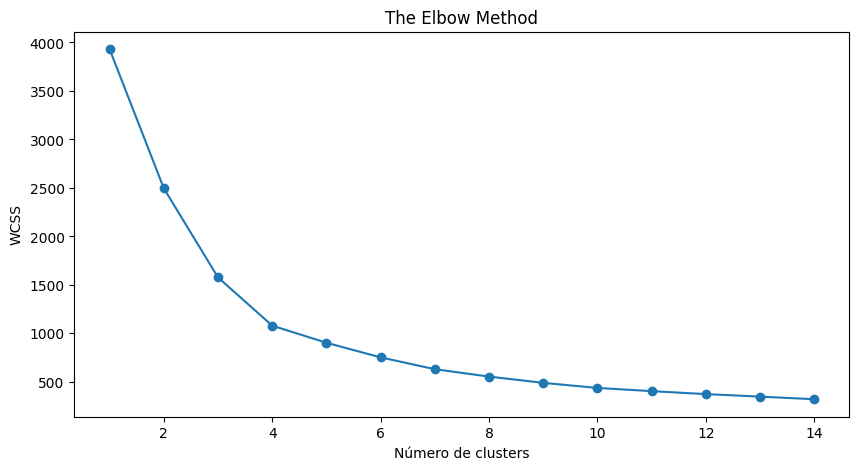

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(range(1,15),wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()


In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 5, max_iter = 300)


In [ ]:
kmeans1 = kmeans.fit(df_scaled[['Annual Income ($)','Spending Score (1-100)']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
# Coordenadas dos Centróides
centroides = kmeans1.cluster_centers_
centroides

array([[-0.81738372, -0.86908948],
       [ 0.81466944,  0.95901548],
       [-0.85468684,  0.82325915],
       [ 0.9153496 , -0.74756938]])

In [ ]:
# Classificação dos dados
classificacao = kmeans1.labels_
classificacao

array([0, 2, 0, ..., 0, 3, 2], dtype=int32)

In [ ]:
grafico = px.scatter(x = df_scaled['Annual Income ($)'], y = df_scaled['Spending Score (1-100)'], color=classificacao)
grafico.show()

##### Inluindo os centroids no gráfico

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
#SepalLengthCm x PetalLengthCm
graf1 = px.scatter(x = df_scaled['Annual Income ($)'], y = df_scaled['Spending Score (1-100)'], color=classificacao)
graf2 = px.scatter(x = centroides[:,0], y = centroides[:,1], size = [10, 10, 10, 10])
graf3 = go.Figure(data = graf1.data + graf2.data)
graf3.update_layout(width=800,height=500,title_text='Agrupamento K-Means')
graf3.update_xaxes(title = 'Annual Income ($)')
graf3.update_yaxes(title = 'Spending Score (1-100)')
graf3.show()

##### Criação de nova coluna com o valor do cluster para cada amostra
* Altera o Dataframe original

In [ ]:
# Adiciona a coluna cluster
df['cluster'] = kmeans1.labels_
df.head()

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,cluster
0,1,19,15000,39,5,1,4,0
1,1,21,35000,81,2,3,3,2
2,0,20,86000,6,2,1,1,0
3,0,23,59000,77,7,0,2,2
4,0,31,38000,40,3,2,6,0


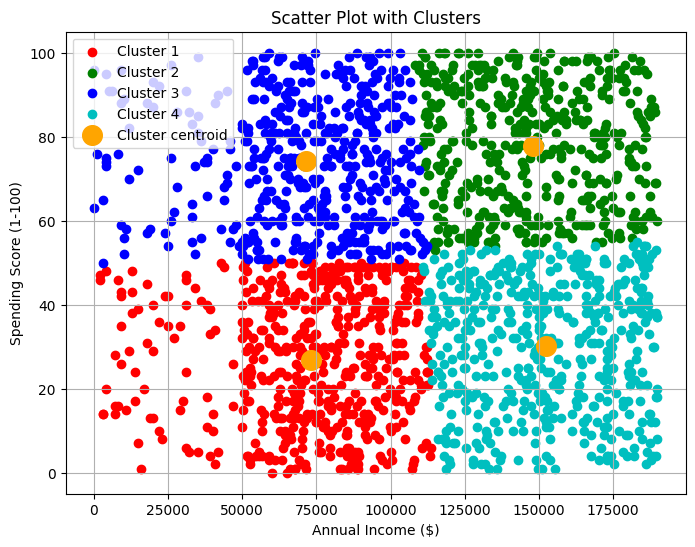

In [ ]:
colors = ['r', 'g', 'b', 'c']


# Create the scatter plot with different colors for each cluster
plt.figure(figsize=(8, 6))
for i in range(4):
    cluster_data = df[df['cluster'] == i]
    plt.scatter(cluster_data['Annual Income ($)'], cluster_data['Spending Score (1-100)'], c=colors[i], label=f'Cluster {i+1}')
    if i == 3:  # Add the centroid legend entry only for the first cluster
        plt.scatter(cluster_data['Annual Income ($)'].mean(), cluster_data['Spending Score (1-100)'].mean(), s=200, c='orange', marker='o', label='Cluster centroid')
    else:
        plt.scatter(cluster_data['Annual Income ($)'].mean(), cluster_data['Spending Score (1-100)'].mean(), s=200, c='orange', marker='o')

plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score (1-100)')
plt.title('Scatter Plot with Clusters')
plt.legend()
plt.grid(True)
plt.show()